# Talbot Image Processing

In this section, we'll take a Talbot image and attempt to take the Fourier transform.

In [1]:
import os
import numpy as np
from scipy import signal
from skimage import filters
import matplotlib.pyplot as plt
from PIL import Image

# Single Image Workflow

WIN_20240510_12_55_10_Pro.jpg
WIN_20240510_12_55_12_Pro.jpg
WIN_20240510_12_55_13_Pro.jpg
WIN_20240510_12_55_15_Pro.jpg
WIN_20240510_12_55_16_Pro.jpg
WIN_20240510_12_55_18_Pro.jpg
WIN_20240510_12_55_20_Pro.jpg
WIN_20240510_12_55_21_Pro.jpg
WIN_20240510_12_55_22_Pro.jpg
WIN_20240510_12_55_24_Pro.jpg


<Figure size 1800x1200 with 0 Axes>

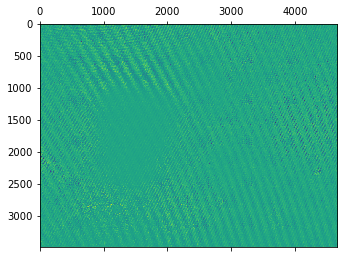

In [62]:
xmin = 2500
xmax = 2550
ymin = 2050
ymax = 2100

path = r"C:\Users\jade2\Dropbox (Personal)\Courses\QuantumLab\Project_MOT\data\Day3\green"

if os.path.isdir(path):
    # Perform averaging
    tot = np.zeros(np.asarray(Image.open(os.path.join(path,os.listdir(path)[0]))).shape)
    for f in os.listdir(path):
        print(os.path.split(f)[-1])
        img = np.asarray(Image.open(os.path.join(path,f)))
        tot = tot + img
    img = np.mean(tot, axis=2)
else:
    img = np.mean(np.asarray(Image.open(path)), axis=2)

#img = img[ymin:ymax, xmin:xmax]
filt = filters.difference_of_gaussians(img, 0, 10)
plt.figure(dpi=300)
plt.matshow(filt)

#plt.savefig("green_crop50x50", dpi=300)

plt.show()

In [63]:
# guess parameters
# lengths in microns
pix = 1.365 # pixel pitch
gratinglen = 1.2 # periodicity of grating
theta = 20.5 * np.pi / 180 # sensor tilt away from grating plane

# Compute the FFT per row
pad_factor = 4
FFT = np.zeros(filt.shape[1] * pad_factor)
for i in range(filt.shape[0]):
    sig = np.concatenate((filt[i, :], np.zeros(filt.shape[1] * (pad_factor-1)) ))
    fft = np.fft.fft(sig)
    FFT = FFT + fft
result = np.abs(FFT)

sampling_period = pix * np.sin(theta) # microns
frequencies = np.fft.fftfreq(FFT.shape[0], sampling_period) # spatial frequency in 1/microns of the Talbot pattern
tal = 1 / frequencies

C:\Users\jade2\AppData\Local\Temp\ipykernel_11032\3744519545.py:18: RuntimeWarning: divide by zero encountered in divide
  tal = 1 / frequencies


C:\Users\jade2\AppData\Local\Temp\ipykernel_11032\1587986772.py:7: RuntimeWarning: invalid value encountered in divide
  wavelengths = 2 * tal * gratinglen**2 / (tal**2 + gratinglen**2)


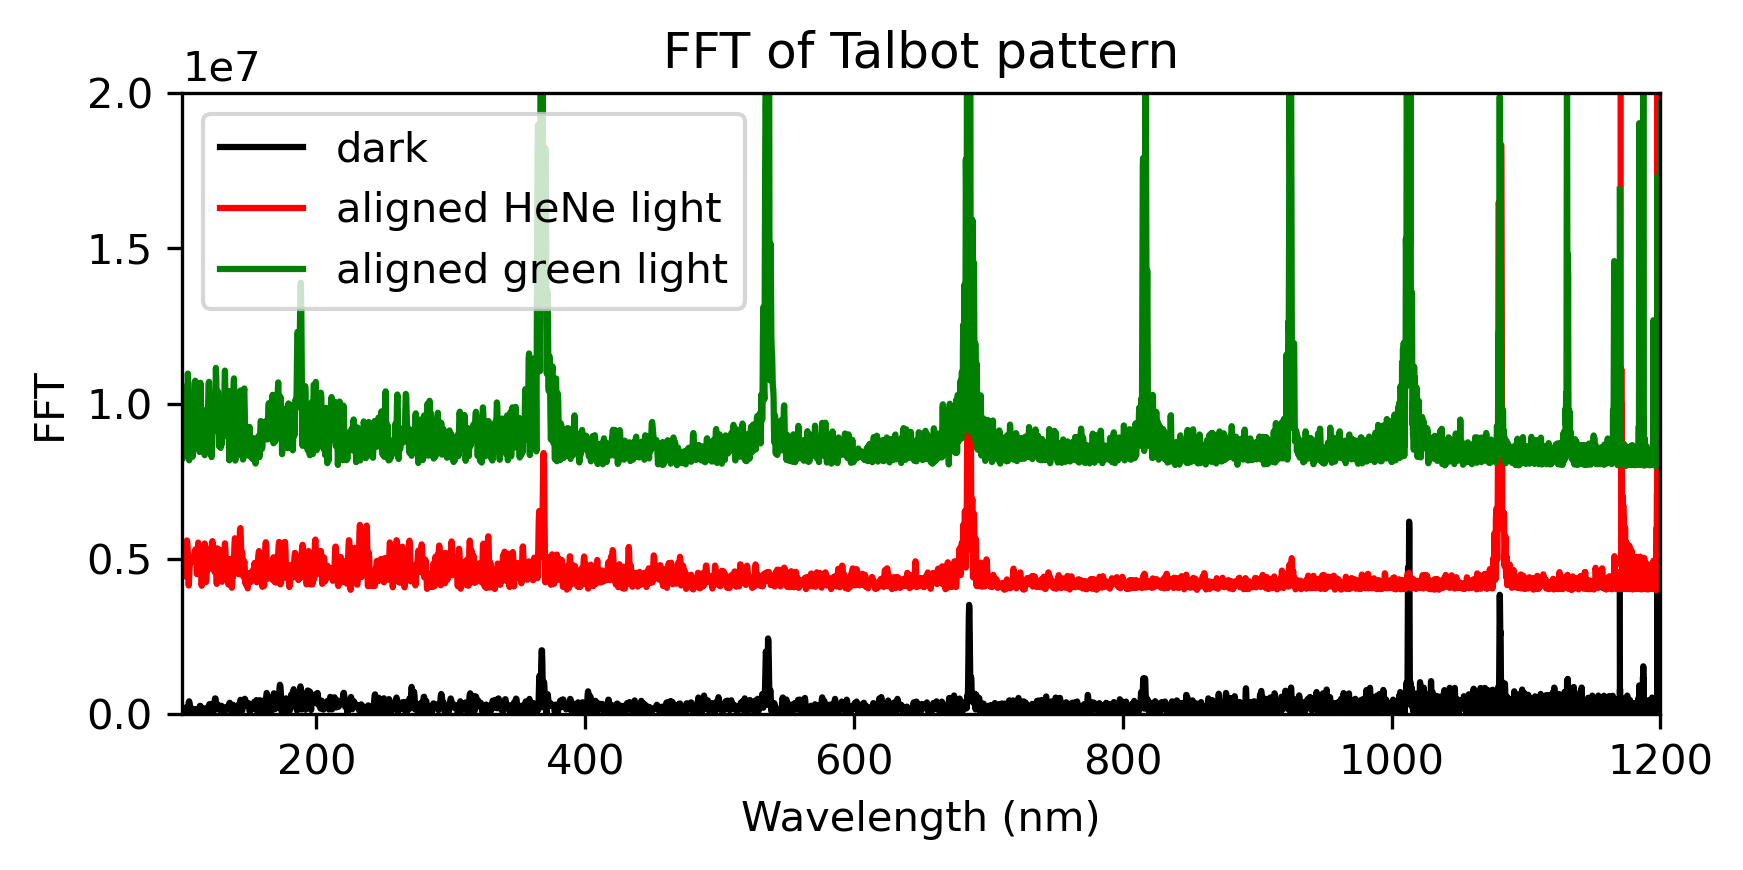

In [64]:
plt.figure(figsize=(6, 3), dpi=300)
#plt.xlim(0, 12)
plt.xlim(100, 1200)
plt.ylim(0, 2e7)

# Convert spatial frequency into wavelength of incident light
wavelengths = 2 * tal * gratinglen**2 / (tal**2 + gratinglen**2)
#plt.plot(tal[1:len(tal)//2], result[1:len(tal)//2], color='g')
plt.plot(wavelengths[1:len(tal)//2] * 1000, prev*2, color='k', label='dark')
plt.plot(wavelengths[1:len(tal)//2] * 1000, prev2 + 0.4e7, color='r', label='aligned HeNe light')
plt.plot(wavelengths[1:len(tal)//2] * 1000, result[1:len(tal)//2] + 0.8e7, color='g', label='aligned green light')

#plt.xlabel("Talbot z (um)")
plt.xlabel("Wavelength (nm)")
plt.ylabel("FFT")
plt.title("FFT of Talbot pattern")
plt.legend()
plt.tight_layout()

#plt.savefig("allspec_compared", dpi=150)

plt.show()

In [46]:
# hack to store the previous result for comparing
#prev = result[1:len(tal)//2]
prev2 = result[1:len(tal)//2]

# Multiple Image Workflow

### view, crop, and filter multiple images

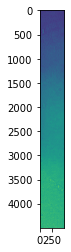

In [53]:
xmin = 2500
xmax = 3000
ymin = 0
ymax = 4500

paths = [r"C:\Users\jade2\Dropbox (Personal)\Courses\QuantumLab\Project_MOT\data\Day2\redpointer_underexp\WIN_20240506_16_46_46_Pro.jpg",
        r"C:\Users\jade2\Dropbox (Personal)\Courses\QuantumLab\Project_MOT\data\Day2\hene_underexpanded\WIN_20240506_16_35_19_Pro.jpg",
        r"C:\Users\jade2\Dropbox (Personal)\Courses\QuantumLab\Project_MOT\data\Day2\green_underexp\WIN_20240506_16_56_23_Pro.jpg"]

names = ['red', 'hene', 'green']

filtered = []
for p in paths:
    img = np.mean(np.asarray(Image.open(p)), axis=2).transpose()
    #print(img.shape)
    img = img[ymin:ymax, xmin:xmax]
    filt = filters.difference_of_gaussians(img, 0, 10)
    filtered.append(filt)
    plt.imshow(img)

In [54]:
# guess parameters
# lengths in microns
pix = 1.365 # pixel pitch
gratinglen = 1.2 # periodicity of grating
theta = 20.5 * np.pi / 180 # sensor tilt away from grating plane

Talbots = []
results = []
for filt in filtered:
    # Compute the FFT per column
    pad_factor = 4
    FFT = np.zeros(filt.shape[0] * pad_factor)
    for i in range(filt.shape[1]):
        sig = np.concatenate((filt[:, i], np.zeros(filt.shape[0] * (pad_factor-1)) ))
        fft = np.fft.fft(sig)
        FFT = FFT + fft
    result = np.abs(FFT)
    results.append(result)

    sampling_period = pix * np.sin(theta) # microns
    frequencies = np.fft.fftfreq(FFT.shape[0], sampling_period) # spatial frequency in 1/microns of the Talbot pattern
    Talbot_lengths = 1 / frequencies
    Talbots.append(Talbot_lengths)

C:\Users\jade2\AppData\Local\Temp\ipykernel_14248\3367489992.py:22: RuntimeWarning: divide by zero encountered in divide
  Talbot_lengths = 1 / frequencies


C:\Users\jade2\AppData\Local\Temp\ipykernel_14248\2532482765.py:29: RuntimeWarning: invalid value encountered in divide
  wavelengths = 2 * tal * gratinglen**2 / (tal**2 + gratinglen**2)


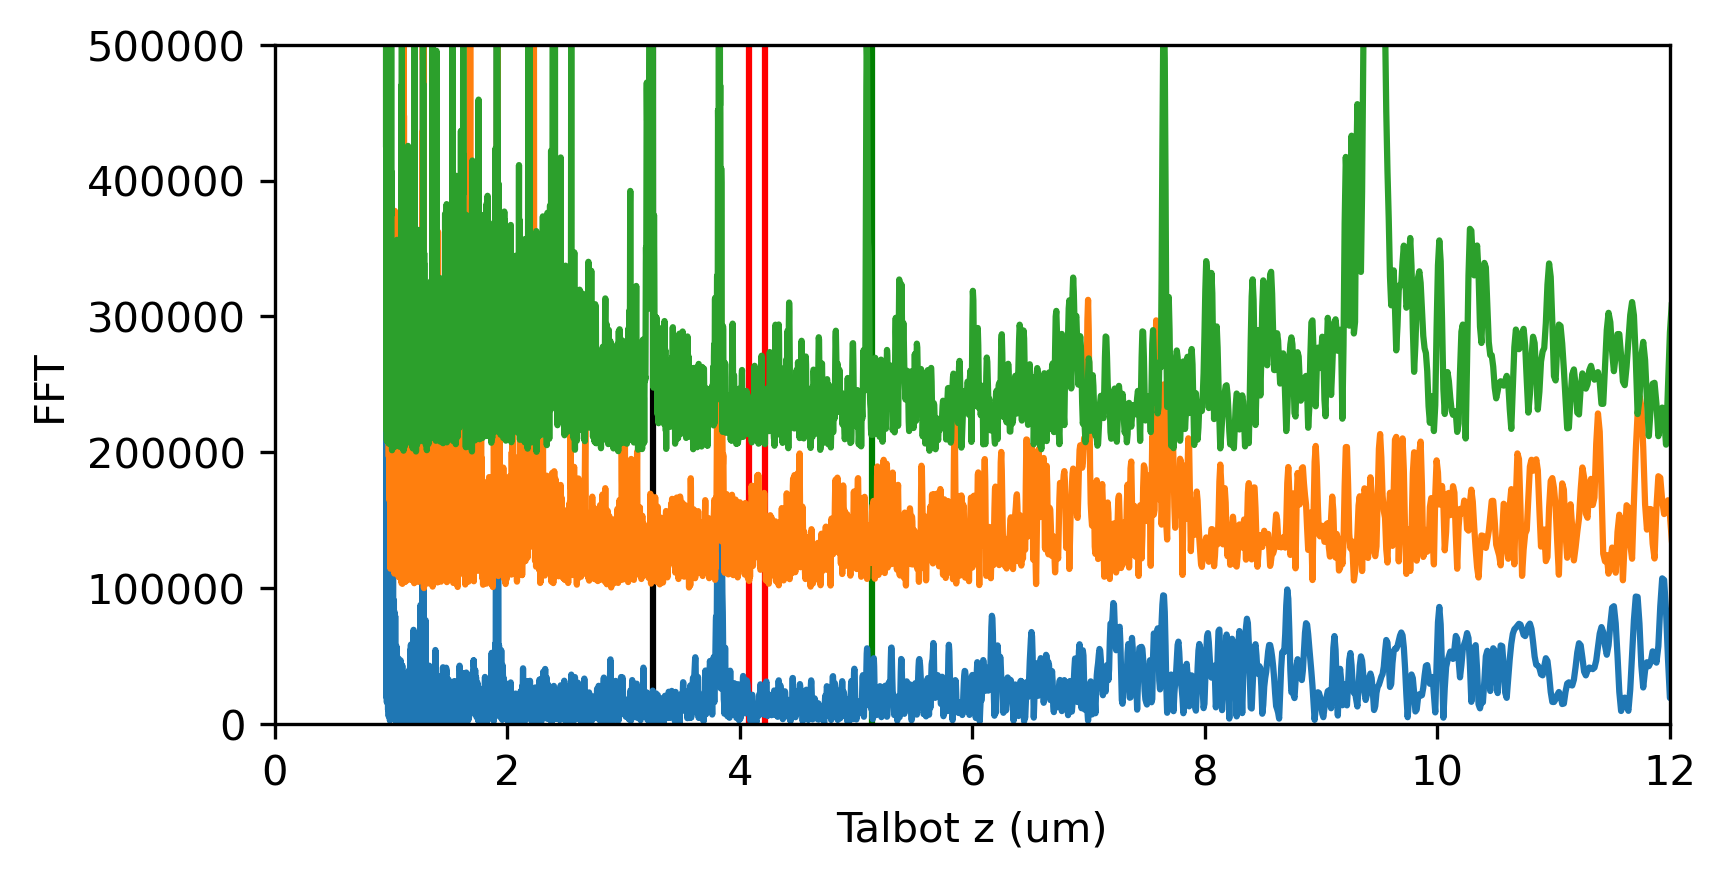

In [55]:
plt.figure(figsize=(6, 3), dpi=300)
plt.xlim(0, 12)
plt.ylim(0, 0.5e6)
# plt.axvline(650, color='red', label='red')
# plt.axvline(632.8, color='orange', label='HeNe')
# plt.axvline(532, color='green', label='green')

lamb = 0.780
zT = lamb / (1-np.sqrt(1-lamb**2/gratinglen**2))
plt.axvline(zT, color='k')

lamb = 0.650
zT = lamb / (1-np.sqrt(1-lamb**2/gratinglen**2))
plt.axvline(zT, color='r')

lamb = 0.632
zT = lamb / (1-np.sqrt(1-lamb**2/gratinglen**2))
plt.axvline(zT, color='r')

lamb = 0.532
zT = lamb / (1-np.sqrt(1-lamb**2/gratinglen**2))
plt.axvline(zT, color='g')

offset = 0
for path, name, tal, result in zip(paths, names, Talbots, results):
#     if name == 'green':
#         result /= 5
    # Convert spatial frequency into wavelength of incident light
    wavelengths = 2 * tal * gratinglen**2 / (tal**2 + gratinglen**2)
    plt.plot(tal[1:len(tal)//2], result[1:len(tal)//2] + offset, label=name)
    #plt.plot(wavelengths[1:len(tal)//2] * 1000, result[1:len(tal)//2] + offset, label=name)
    offset += 1e5
plt.xlabel("Talbot z (um)")
plt.ylabel("FFT")
#plt.legend(loc='upper right')

#plt.savefig(os.path.splitext(path)[0], dpi=150)

plt.show()